In [1]:
filename2=r"C:\Users\HP-PC\Desktop\Data Mining\risk_factors_cervical_cancer30.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
pddata = pd.read_csv(filename2)
data = pddata.iloc[:,:]
pddata.shape

(858, 36)

In [3]:
pddata.info()
data2=pddata.replace("?",np.nan)
data2.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [4]:
data2.drop(data2.columns[[26,27,31,32,33,34]], axis=1, inplace=True)
data1 = data2.copy()
data3 = data2.copy()
data2 = data2.copy().values
data1 = data1.convert_objects(convert_numeric=True) 
#data3 = data3.convert_objects(convert_numeric=True)
#del data3['Biopsy']
#x = data3.values
#y = data['Biopsy'].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


In [5]:
data2

array([[18, '4.0', '15.0', ..., 0, 0, 0],
       [15, '1.0', '14.0', ..., 0, 0, 0],
       [34, '1.0', nan, ..., 0, 0, 0],
       ...,
       [25, '2.0', '17.0', ..., 0, 0, 0],
       [33, '2.0', '24.0', ..., 0, 0, 0],
       [29, '2.0', '20.0', ..., 0, 0, 0]], dtype=object)

In [6]:

#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
#imputer=imputer.fit(data2[:,:])
#data2[:,:]=imputer.transform(data2[:,:])

#print(imputer.transform(data2[:,:]))      



In [7]:
#data1 is pd read
#data2 is .values array
data1['Number of sexual partners'] = data1['Number of sexual partners'].fillna(data1['Number of sexual partners'].mean())
data1['First sexual intercourse'] = data1['First sexual intercourse'].fillna(data1['First sexual intercourse'].mean())
data1['Num of pregnancies'] = data1['Num of pregnancies'].fillna(data1['Num of pregnancies'].mean())
data1['Smokes'] = data1['Smokes'].fillna(data1['Smokes'].median())
data1['Smokes (years)'] = data1['Smokes (years)'].fillna(data1['Smokes (years)'].mean())
data1['Smokes (packs/year)'] = data1['Smokes (packs/year)'].fillna(data1['Smokes (packs/year)'].mean())
data1['Hormonal Contraceptives'] =data1['Hormonal Contraceptives'].fillna(data1['Hormonal Contraceptives'].median())
data1['Hormonal Contraceptives (years)'] = data1['Hormonal Contraceptives (years)'].fillna(data1['Hormonal Contraceptives (years)'].mean())
data1['IUD'] = data1['IUD'].fillna(data1['IUD'].median()) 
data1['IUD (years)'] = data1['IUD (years)'].fillna(data1['IUD (years)'].mean())
data1['STDs'] = data1['STDs'].fillna(data1['STDs'].median())
data1['STDs (number)'] =data1['STDs (number)'].fillna(data1['STDs (number)'].median())
data1['STDs:condylomatosis'] = data1['STDs:condylomatosis'].fillna(data1['STDs:condylomatosis'].median())
data1['STDs:cervical condylomatosis'] = data1['STDs:cervical condylomatosis'].fillna(data1['STDs:cervical condylomatosis'].median())
data1['STDs:vaginal condylomatosis'] = data1['STDs:vaginal condylomatosis'].fillna(data1['STDs:vaginal condylomatosis'].median())
data1['STDs:vulvo-perineal condylomatosis'] = data1['STDs:vulvo-perineal condylomatosis'].fillna(data1['STDs:vulvo-perineal condylomatosis'].median())
data1['STDs:syphilis'] = data1['STDs:syphilis'].fillna(data1['STDs:syphilis'].median())
data1['STDs:pelvic inflammatory disease'] = data1['STDs:pelvic inflammatory disease'].fillna(data1['STDs:pelvic inflammatory disease'].median())
data1['STDs:genital herpes'] = data1['STDs:genital herpes'].fillna(data1['STDs:genital herpes'].median())
data1['STDs:molluscum contagiosum'] = data1['STDs:molluscum contagiosum'].fillna(data1['STDs:molluscum contagiosum'].median())
data1['STDs:AIDS'] = data1['STDs:AIDS'].fillna(data1['STDs:AIDS'].median())
data1['STDs:HIV'] = data1['STDs:HIV'].fillna(data1['STDs:HIV'].median())
data1['STDs:Hepatitis B'] = data1['STDs:Hepatitis B'].fillna(data1['STDs:Hepatitis B'].median())
data1['STDs:HPV'] = data1['STDs:HPV'].fillna(data1['STDs:HPV'].median())


In [8]:
data1



,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Biopsy
0,18,4.0,15.0000,1.000000,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,15,1.0,14.0000,1.000000,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,34,1.0,16.9953,1.000000,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,52,5.0,16.0000,4.000000,1.0,37.000000,37.00,1.0,3.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4,46,3.0,21.0000,4.000000,0.0,0.000000,0.00,1.0,15.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5,42,3.0,23.0000,2.000000,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
6,51,3.0,17.0000,6.000000,1.0,34.000000,3.40,0.0,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
7,26,1.0,26.0000,3.000000,0.0,0.000000,0.00,1.0,2.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
8,45,1.0,20.0000,5.000000,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
9,44,3.0,15.0000,2.275561,1.0,1.266973,2.80,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [9]:


data1.isnull().sum() 

#corrmat = data1.corr(method='kendall')
#top_corr_features = corrmat.index

#plt.figure(figsize=(20,20))
#plot heat map
#g=sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap="rainbow")

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [10]:
data3 = data1.copy()
del data3['Biopsy']
x = data3
y = data['Biopsy']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.68355350e-01 1.16442234e-01 1.34755983e-01 1.29522927e-01
 1.12943352e-02 4.00134214e-02 2.80771317e-02 2.66177123e-02
 1.72075543e-01 1.44924882e-02 3.90411645e-02 4.41718168e-03
 1.02356087e-02 7.47123405e-04 0.00000000e+00 1.62719697e-03
 3.83083388e-03 3.56848180e-03 3.75512267e-05 1.55862012e-02
 3.32775339e-04 0.00000000e+00 1.17101909e-02 8.72490448e-04
 1.12653680e-03 1.15786316e-02 1.57547295e-02 1.89786481e-02
 1.89075293e-02]


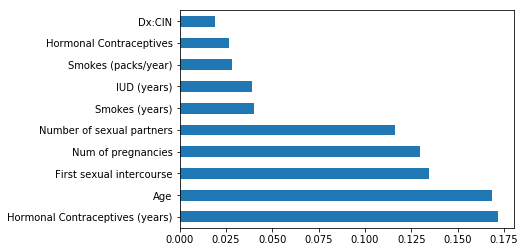

In [11]:
 #use inbuilt class feature_importances of tree based classifiers
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [12]:
#wrapper Backward Elimination
import statsmodels.api as sm
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['Hormonal Contraceptives (years)', 'STDs:condylomatosis', 'STDs:genital herpes', 'STDs:HIV', 'STDs:HPV', 'Dx:CIN', 'Dx:HPV']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.030917
Best score using built-in LassoCV: 0.002910
Lasso picked 1 variables and eliminated the other 6 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

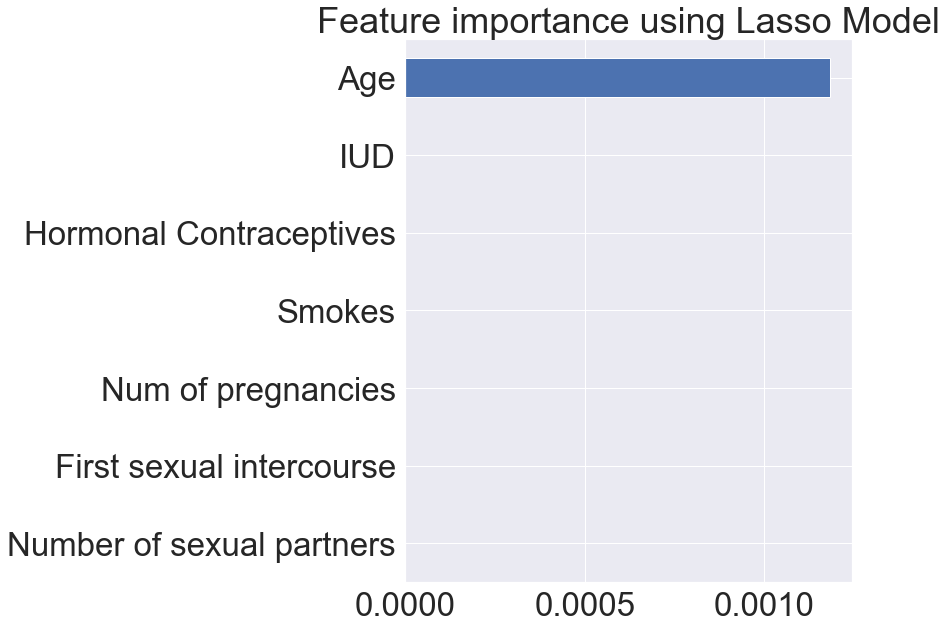

In [27]:
#embedded
#from sklearn.linear_model import RandomizedLasso

rlasso =LassoCV()
rlasso.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % rlasso.alpha_)
print("Best score using built-in LassoCV: %f" %rlasso.score(x,y))
coef = pd.Series(rlasso.coef_, index = x.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [14]:
#lasso random stability selection
from sklearn.linear_model import RandomizedLasso
names =data1[['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)','IUD','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','Dx:Cancer','Dx:CIN','Dx:HPV']]
 
rlasso = RandomizedLasso(alpha=0.0025)
rlasso.fit(x, y)
 
#print "Features sorted by their score:"
print(sorted(zip(map(lambda x: round(x, 1), rlasso.scores_), 
                 names), reverse=True))

ImportError: cannot import name 'RandomizedLasso' from 'sklearn.linear_model' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

In [26]:
#wrapper (Recursive Feature Elimination)
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, linear_model, metrics 
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 42,max_depth=3, min_samples_leaf=5)
svclassifier=SVC(kernel='sigmoid')
gnb = GaussianNB()
reg = linear_model.LogisticRegression() 

#no of features
nof_list=np.arange(1,30)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
    model =clf_gini
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.936047


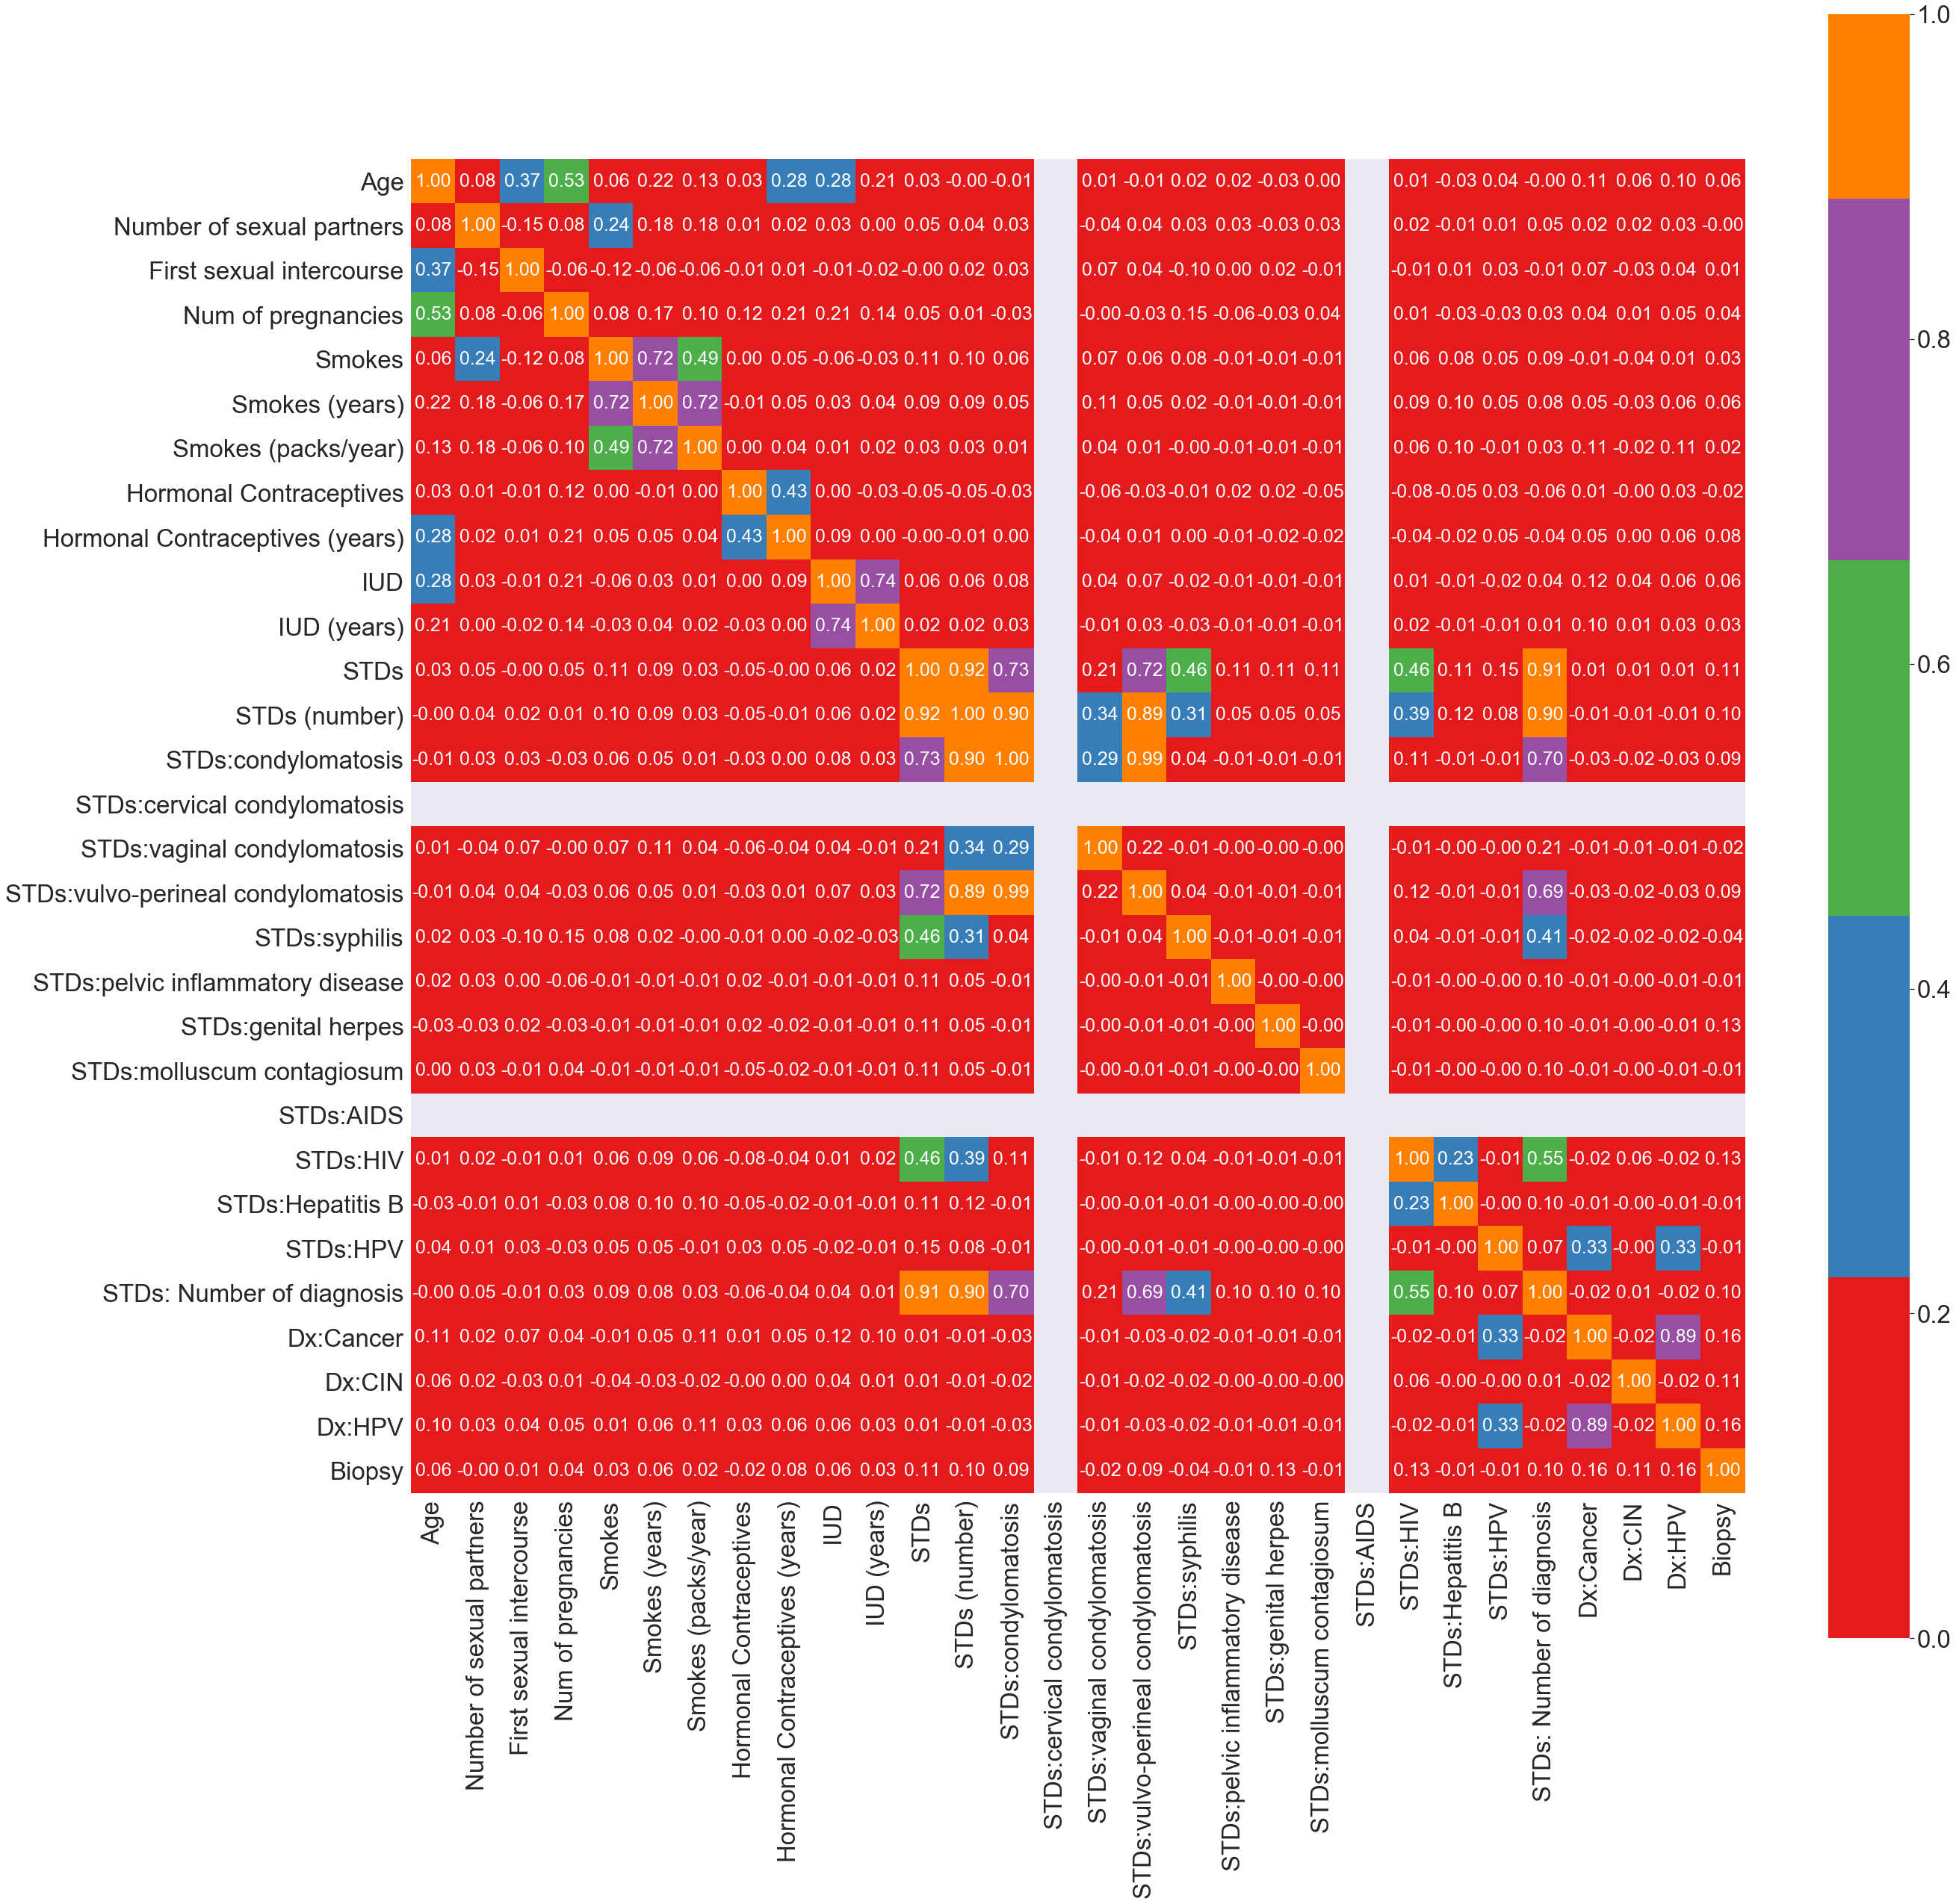

In [20]:
#correlation heatmap
correlationMap = data1.corr()

plt.figure(figsize=(40,40))

sns.set(font_scale=3)
hm = sns.heatmap(correlationMap,cmap = 'Set1', cbar=True, annot=True,vmin=0,vmax =1,center=True, square=True, fmt='.2f', annot_kws={'size': 25},
             yticklabels = data1.columns, xticklabels = data1.columns)
plt.show()


In [22]:
cor = data.corr()
cor_target = abs(cor["Biopsy"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

Age                          0.055956
STDs: Number of diagnosis    0.097449
Dx:Cancer                    0.160905
Dx:CIN                       0.113172
Dx:HPV                       0.160905
Dx                           0.157607
Hinselmann                   0.547417
Schiller                     0.733204
Citology                     0.327466
Biopsy                       1.000000
Name: Biopsy, dtype: float64

In [698]:
#df=pd.DataFrame(x)
#df=df.astype(float)

#x=np.nan_to_num(df)
data1.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.143357,1.219721,0.453144,0.686480,2.256419,0.096737,...,0.001166,0.0,0.020979,0.001166,0.002331,0.087413,0.020979,0.010490,0.020979,0.064103
std,8.497948,1.642267,2.791883,1.399325,0.350641,4.057885,2.209657,0.464194,3.519082,0.295771,...,0.034139,0.0,0.143398,0.034139,0.048252,0.302545,0.143398,0.101939,0.143398,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
x=data1[['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Hormonal Contraceptives','IUD']]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[161   0]
 [ 11   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       161
           1       0.00      0.00      0.00        11

    accuracy                           0.94       172
   macro avg       0.47      0.50      0.48       172
weighted avg       0.88      0.94      0.91       172

Accuracy when using SVM is  93.6046511627907
auc_roc: 0.5
roc_auc: 0.5


Text(0.5, 0, 'False Positive Rate')

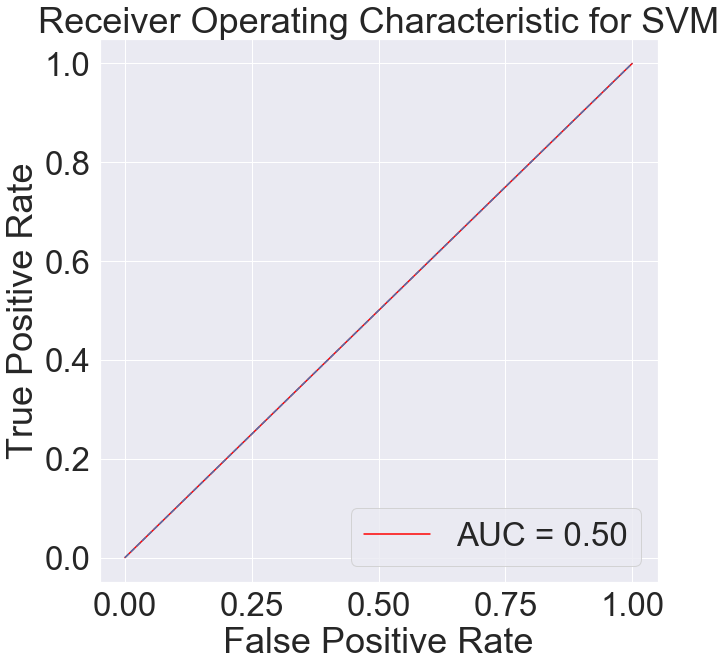

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=42)
svclassifier=SVC(kernel='sigmoid',probability=True)

svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)
y_prob = svclassifier.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print ("Accuracy when using SVM is ", accuracy_score(y_test,y_pred)*100)



auc_roc=metrics.roc_auc_score(y_test,y_pred)
print("auc_roc:",auc_roc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc:",roc_auc)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for SVM')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(train_scaled, y_train)
accuracy_score(y_train, model.predict(train_scaled))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9373177842565598

Accuracy when using Naive Bayes is  88.37209302325581
auc_roc: 0.5567476002258611
roc_auc: 0.5217391304347826


Text(0.5, 0, 'False Positive Rate')

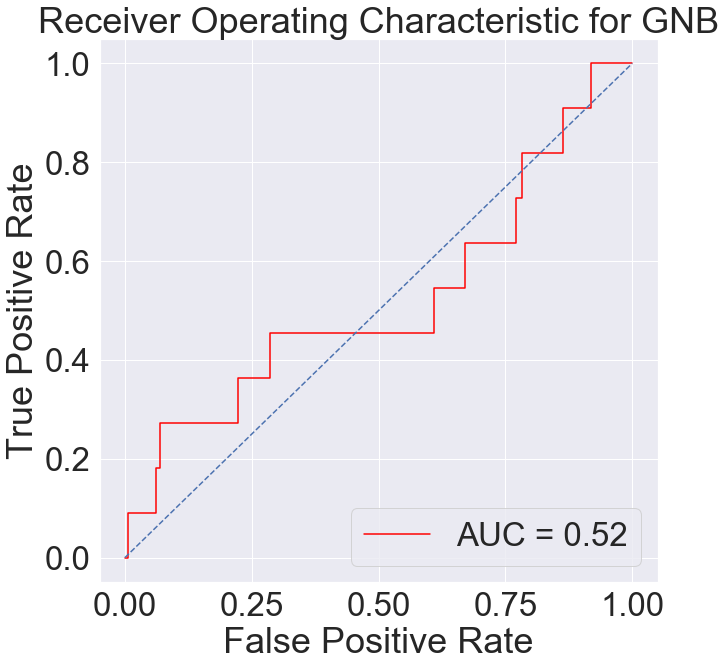

In [701]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.20,random_state=42)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)[:,1]
print ("Accuracy when using Naive Bayes is ", accuracy_score(y_test,y_pred)*100)

auc_roc=metrics.roc_auc_score(y_test,y_pred)
print("auc_roc:",auc_roc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc:",roc_auc)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for GNB')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [702]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.20, random_state=42)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 42,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
max_features=None, max_leaf_nodes=None, min_samples_leaf=10,min_samples_split=2, min_weight_fraction_leaf=0.0,
presort=False, random_state=42, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Accuracy is  93.6046511627907
Accuracy is  93.6046511627907
auc_roc: 0.5
roc_auc: 0.515527950310559
roc_auc: 0.5640880858272163


Text(0.5, 0, 'False Positive Rate')

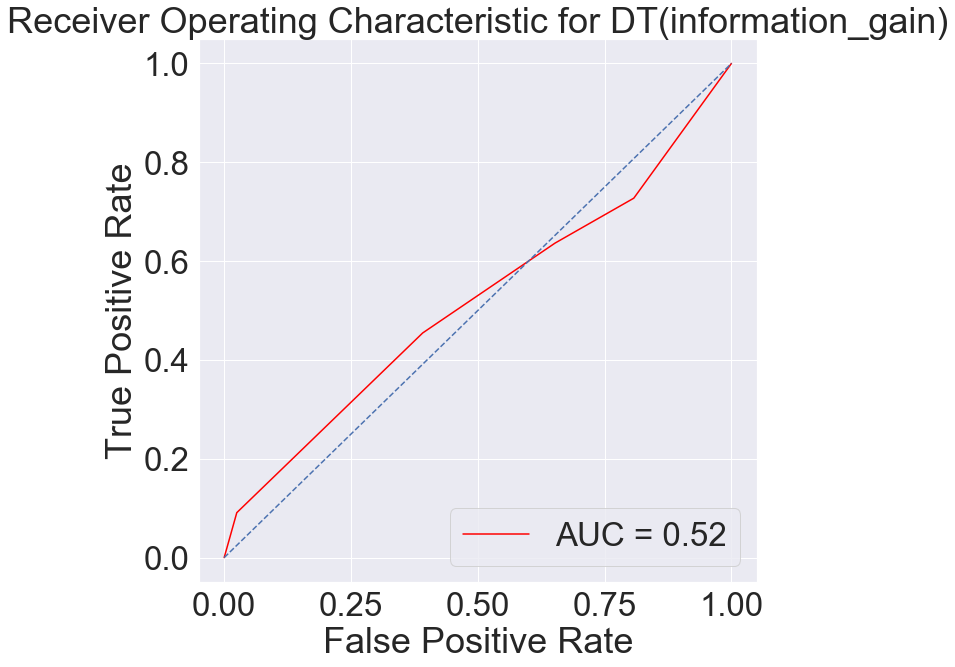

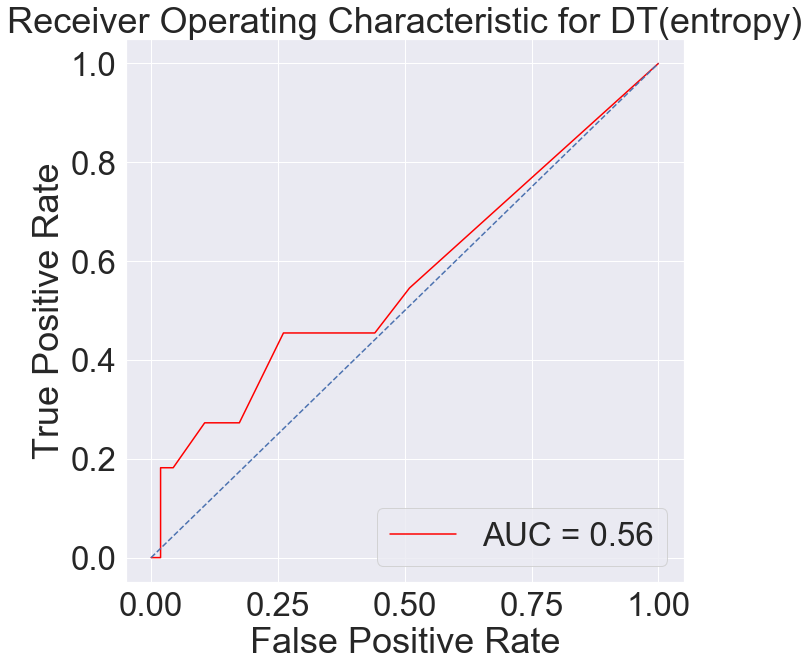

In [703]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 42,max_depth=6, min_samples_leaf=10)
clf_entropy.fit(X_train, y_train)


#clf_gini.predict([[14,13,13,12,12,11.11,10,10,9,9,8,8,7,7,6,6,5,5,4,4,3,3,2,2,1,1]])
y_pred = clf_gini.predict(X_test)
y_prob = clf_gini.predict_proba(X_test)[:,1]
y_pred_en = clf_entropy.predict(X_test)

y_prob_en = clf_entropy.predict_proba(X_test)[:,1]
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)
print( "Accuracy is ", accuracy_score(y_test,y_pred_en)*100)


auc_roc=metrics.roc_auc_score(y_test,y_pred)
print("auc_roc:",auc_roc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc:",roc_auc)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for DT(information_gain)')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_en)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc:",roc_auc)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for DT(entropy)')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [704]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)
print( "Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  93.6046511627907
Accuracy is  93.6046511627907


Logistic Regression model accuracy(in %): 93.6046511627907
auc_roc: 0.5
roc_auc: 0.5409373235460192


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 0, 'False Positive Rate')

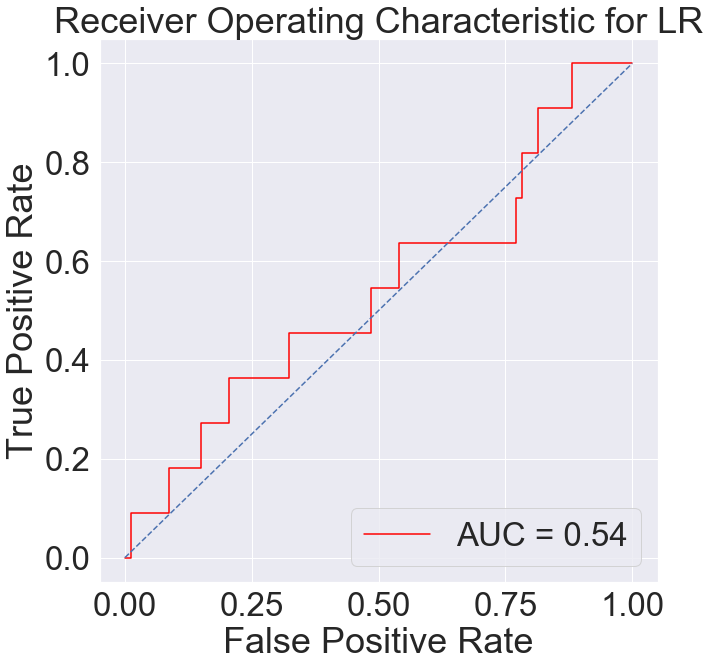

In [705]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42) 

# create logistic regression object 
reg = linear_model.LogisticRegression() 

 
reg.fit(X_train, y_train) 

y_pred = reg.predict(X_test) 

y_prob = reg.predict_proba(X_test)[:,1]


print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100) 

auc_roc=metrics.roc_auc_score(y_test,y_pred)
print("auc_roc:",auc_roc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc:",roc_auc)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for LR')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


[[161   0]
 [ 11   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       161
           1       0.00      0.00      0.00        11

   micro avg       0.94      0.94      0.94       172
   macro avg       0.47      0.50      0.48       172
weighted avg       0.88      0.94      0.91       172

KNN model accuracy(in %): 93.6046511627907
auc_roc: 0.5
roc_auc: 0.5525127046866178


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 0, 'False Positive Rate')

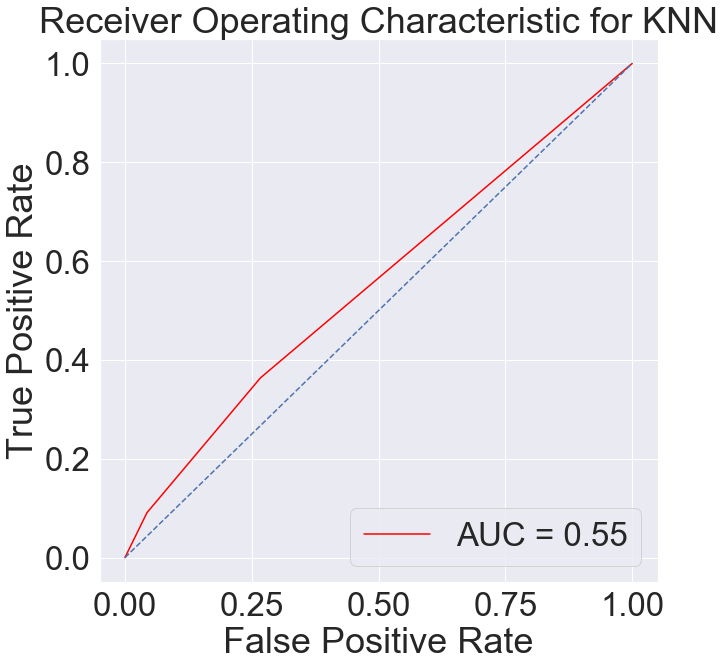

In [706]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("KNN model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100) 
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print("auc_roc:",auc_roc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc:",roc_auc)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for KNN')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
      